<a href="https://colab.research.google.com/github/maytepuchure08/practicasdeQuimica/blob/main/Termodin%C3%A1mica_vs_Cin%C3%A9tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
!pip install rdkit
!pip install pyscf

In [62]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
from pyscf import gto, scf

In [63]:
# representación SMILES del isómero CIS
smi_cis = "O=CO"
# elemento de RDKit
cis = Chem.MolFromSmiles(smi_cis)
# agregamos sus hidrógenos
cis = Chem.AddHs(cis)
# etiquetamos sus átomos y generamos sus coordenadas usando una semilla
Chem.AllChem.EmbedMolecule(cis, useRandomCoords=False,randomSeed=1234)
# guardamos a un archivo XYZ
Chem.MolToXYZFile(cis, "cis.xyz")

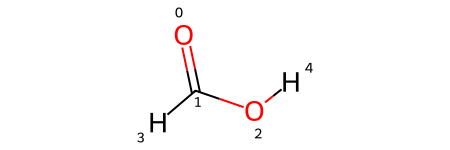

In [64]:
#visualizamos
cis

In [65]:
# visualizamos las coordenadas en el archivo XYZ
!cat cis.xyz

5

O     -0.716414    1.165969    0.240867
C     -0.458745   -0.055204    0.230827
O      0.826557   -0.494694    0.129333
H     -1.277154   -0.751936    0.304341
H      1.625755    0.135865    0.239444


In [66]:
smi_trans = "O=C\O"
trans = Chem.MolFromSmiles(smi_trans)
trans = Chem.AddHs(trans)
Chem.AllChem.EmbedMolecule(trans, useRandomCoords=False,randomSeed=1234)
Chem.MolToXYZFile(trans, "trans.xyz")

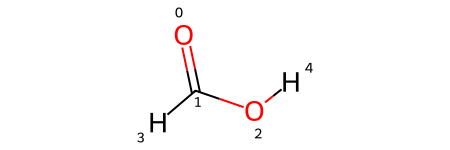

In [67]:
trans

In [68]:
# visualizamos las coordenadas en el archivo XYZ
!cat cis.xyz

5

O     -0.716414    1.165969    0.240867
C     -0.458745   -0.055204    0.230827
O      0.826557   -0.494694    0.129333
H     -1.277154   -0.751936    0.304341
H      1.625755    0.135865    0.239444


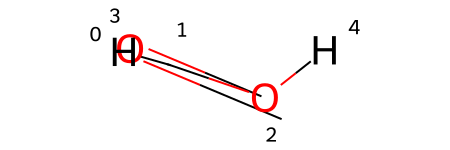

In [69]:
Chem.AllChem.SetDihedralDeg(cis.GetConformer(0),3,2,1,0,90.0)
Chem.MolToXYZFile(cis, "diedro90.xyz")
cis

In [70]:
!cat diedro90.xyz

5

O     -0.972889    0.160335    1.347500
C     -0.458745   -0.055204    0.230827
O      0.826557   -0.494694    0.129333
H     -1.056103    0.114801   -0.649453
H      1.625755    0.135865    0.239444


In [71]:
cis = gto.M(atom="cis.xyz")

In [72]:
cis.basis = "6-31G"
mf_cis = cis.KS()
mf_cis.xc = 'b3lyp'

In [73]:
resultado_cis = mf_cis.kernel()
resultado_cis

converged SCF energy = -187.129033059614


-187.12903305961424

In [74]:
cis_90 = gto.M(atom="diedro90.xyz")

In [75]:
cis_90.basis = "6-31G"
mf_90 = cis_90.KS()
mf_90.xc = 'b3lyp'

In [76]:
resultado_cis_90 = mf_90.kernel()
resultado_cis_90

converged SCF energy = -187.113091366987


-187.1130913669868

In [77]:
trans = gto.M(atom="trans.xyz")

In [78]:
trans.basis = "6-31G"
mf_trans = trans.KS()
mf_trans.xc = 'b3lyp'

In [79]:
resultado_trans= mf_trans.kernel()
resultado_trans

converged SCF energy = -187.129033059614


-187.1290330596143

In [80]:
%%capture
!pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams

In [81]:
import matplotlib.pyplot as plt
from energydiagram import ED

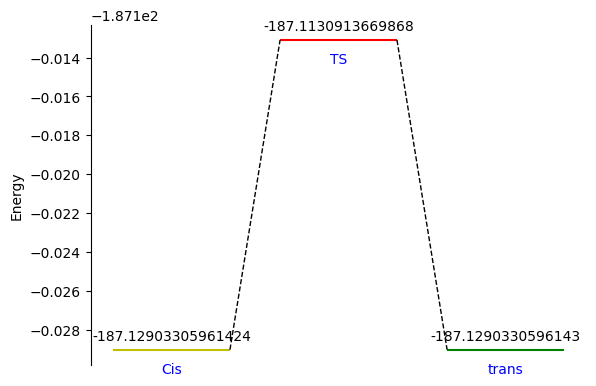

In [82]:
diagram = ED()
diagram.add_level(resultado_cis,'Cis',color='y')
diagram.add_level(resultado_cis_90,'TS',color='r')
diagram.add_level(resultado_trans,'trans',color='g')

diagram.add_link(0,1)
diagram.add_link(1,2)
diagram.plot(ylabel="Energy") # / $kcal$ $mol^{-1}$")

In [83]:
E_activacion = resultado_cis_90 - resultado_cis
E_activacion

0.015941692627450266

In [84]:
entalpia = resultado_trans - resultado_cis
if entalpia>0:
  print("La reacción es endotérmica")
else:
    print("La reacción es exotérmica")

La reacción es exotérmica
